In [4]:
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt



In [5]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/HiSpEC-analysis/new/Bentham/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/HiSpEC-analysis/new/Bentham/CV-3.3.0.0__0.csv


Fitted parameters saved to the interpolation attribute are:
        Amplitude:1.0009394360417019
        Period:400.0003683148875
        Phase: 0.00014585976212695456 
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


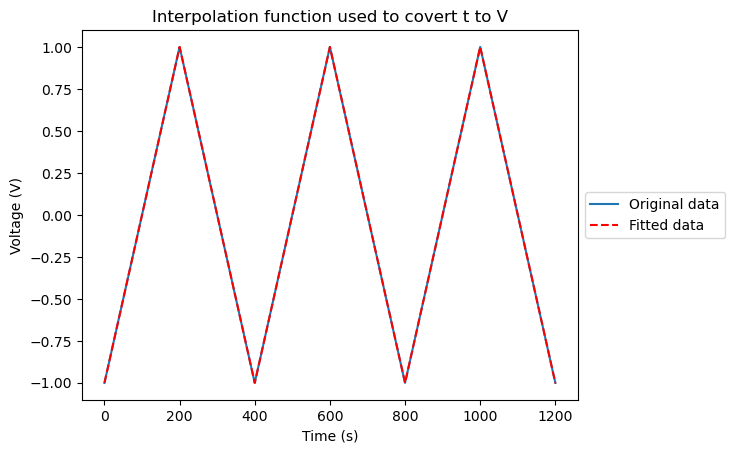

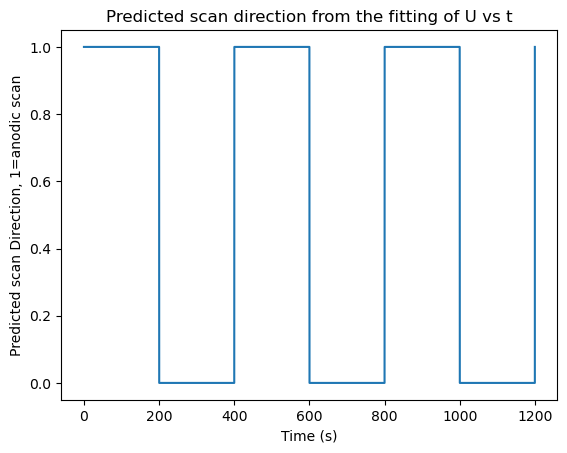

In [6]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

(20001, 2)


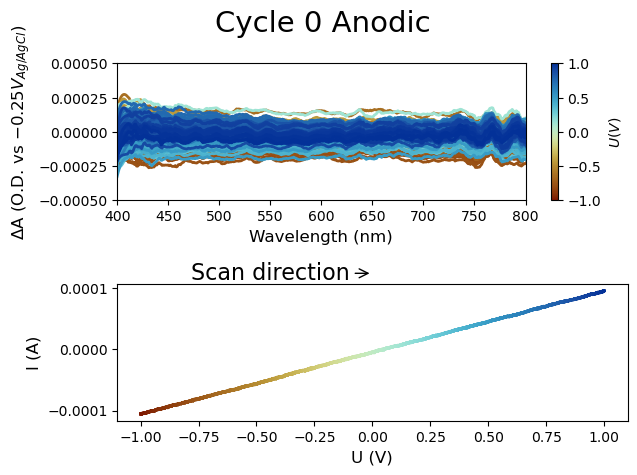

FileNotFoundError: [Errno 2] No such file or directory: '/Users/benj/Documents/HiSpEC-analysis/new/Bentham/Plots/Plots/Cycle_0_Anodic.png'

<Figure size 640x480 with 0 Axes>

In [7]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.25, 21)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 0.25, 21)
            sp.Co_plot_DOD_and_CV(test, CV, Title=f'Cycle {key} {key2}', y_max=0.0005, y_min=-0.0005, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$", scan_direction=key2)
            plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 